In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from evaluate import MultiTaskEvaluatior, TASK_CONFIG

Text(0, 0.5, 'Training time per epoch(second)')

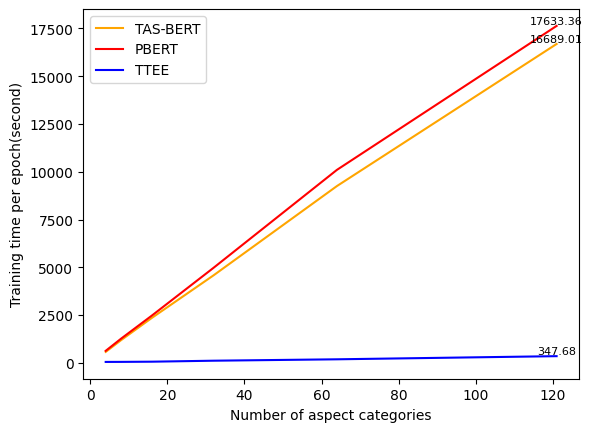

In [31]:
speed_res = pd.read_csv('./train_eval_time.txt')
models = ['TAS-BERT', 'PBERT', 'TTEE']
colors = ['orange', 'red', 'blue']
plt.figure()
for model, color in zip(models, colors):
    sample = speed_res[speed_res.method == model]
    plt.text(sample.n_aspect.iloc[-1], sample.train_time.iloc[-1], str(round(sample.train_time.iloc[-1], 2)), ha='center', va='bottom', fontsize=8)
    plt.plot(sample.n_aspect, sample.train_time, label=model, color=color)
plt.legend()
plt.xlabel('Number of aspect categories')
plt.ylabel('Training time per epoch(second)')

Text(0, 0.5, 'Inference time (second)')

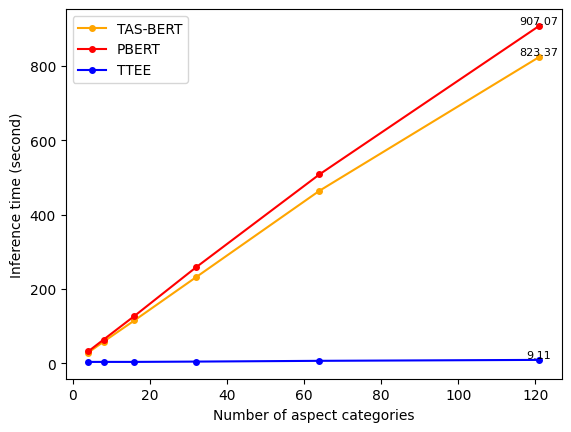

In [30]:
plt.figure()
for model, color in zip(models, colors):
    sample = speed_res[speed_res.method == model]
    plt.text(sample.n_aspect.iloc[-1], sample.eval_time.iloc[-1], str(round(sample.eval_time.iloc[-1], 2)), ha='center', va='bottom', fontsize=8)
    plt.plot(sample.n_aspect, sample.eval_time, label=model, color=color, marker='o', markersize=4)
plt.legend()
plt.xlabel('Number of aspect categories')
plt.ylabel('Inference time (second)')

In [ ]:
plt.plot(speed_res)

In [ ]:
plt.plot(speed_res)

In [18]:
exp = "ttee_laptop_30epoch_128d_1aug_2e-5lr_decaystep_0.91decayrate_0cased_gate_0.2dropout_dropnull_1loss_BIO"
evaluator = MultiTaskEvaluatior(TASK_CONFIG, f"output/{exp}")

In [19]:
for epoch in range(30):
    evaluator.parse(epoch)
    evaluator.eval('TAS')
    evaluator.reset()

In [24]:
evaluator.parse(29)

In [25]:
c = evaluator.task_pools['TAS'].contexts
p = evaluator.task_pools['TAS'].predicts
l = evaluator.task_pools['TAS'].labels

In [28]:
for x, y, z in zip(p,l,c):
    pred = list(x)
    label = list(y)
    if len(pred) and any([p.target != 'NULL' for p in pred]):
        print(pred)

[TAS(target='touchscreen', aspect='DISPLAY#OPERATION_PERFORMANCE', polarity='negative')]
[TAS(target='google', aspect='SUPPORT#GENERAL', polarity='negative')]
[TAS(target='screen', aspect='DISPLAY#DESIGN_FEATURES', polarity='positive')]
[TAS(target='screen', aspect='DISPLAY#OPERATION_PERFORMANCE', polarity='negative')]
[TAS(target='battery', aspect='BATTERY#QUALITY', polarity='negative'), TAS(target='battery', aspect='BATTERY#OPERATION_PERFORMANCE', polarity='negative')]
[TAS(target='fan', aspect='FANS&COOLING#OPERATION_PERFORMANCE', polarity='negative')]
[TAS(target='display', aspect='DISPLAY#GENERAL', polarity='positive'), TAS(target='NULL', aspect='DISPLAY#DESIGN_FEATURES', polarity='positive')]
[TAS(target='laptop', aspect='LAPTOP#DESIGN_FEATURES', polarity='positive'), TAS(target='laptop', aspect='LAPTOP#OPERATION_PERFORMANCE', polarity='positive'), TAS(target='laptop', aspect='LAPTOP#GENERAL', polarity='positive')]
[TAS(target='processor', aspect='CPU#GENERAL', polarity='negative

In [26]:
for x, y, z in zip(p,l,c):
    if x != y:
        print(z)
        print(x)
        print(y)
        print()

the unit cost $ 275 to start with, so it is not worth repairing.
set()
{TAS(target='unit', aspect='LAPTOP#PRICE', polarity='negative')}

going from acer 15 to acer 11 was difficult, 11 inches seems too small for me.
{TAS(target='NULL', aspect='LAPTOP#DESIGN_FEATURES', polarity='negative'), TAS(target='NULL', aspect='KEYBOARD#DESIGN_FEATURES', polarity='negative')}
{TAS(target='acer 11', aspect='LAPTOP#DESIGN_FEATURES', polarity='negative')}

also it's not a true ssd drive in there but emmc, which makes a difference.
set()
{TAS(target='ssd drive', aspect='HARD_DISC#OPERATION_PERFORMANCE', polarity='negative')}

the computer has difficulty switching between tablet and computer.
set()
{TAS(target='computer', aspect='LAPTOP#USABILITY', polarity='negative')}

2 / 28 / 18 - a couple days ago i updated the chrome os.
set()
{TAS(target='chrome os', aspect='OS#GENERAL', polarity='neutral')}

it's just that chrome doesn't work the same with a chromebook as it does with windows.
set()
{TAS(target

[]